In [109]:
import numpy as np
import matplotlib.pyplot as plt
import jax.numpy as jnp
from jax import grad, jit, vmap
from jax import random
import seaborn as sns
import wandb

In [110]:
api = wandb.Api()
run = api.run("/varadi-epfl/sub-n-grams/runs/8euaaqn4")
run = api.run("/varadi-epfl/sub-n-grams/runs/adpdm9kq")

h = run.scan_history()

In [111]:
ungiram = run.summary["unigram"]
bigram = run.summary["bigram"]
bayes = run.summary["bayes"]

In [113]:
losses = [row["loss"] for row in h]
grad_norms = [row["grad_norm"] for row in h]
bayes = [row["bayes"] for row in h]
unigram = [row["unigram"] for row in h]
bigram = [row["bigram"] for row in h]
step = [row["step"] for row in h]


In [91]:
custom_CMAP = sns.cubehelix_palette(8, start=0.5, rot=-0.75, as_cmap=True, reverse=True)
colors = custom_CMAP(jnp.linspace(0, 1, 7))

def plot_losses(
    test_losses,
    bayes,
    save_every,
    fontsize=20,
    unigram=None,
    bigram=None,
    trigram=None,
):
    fig = plt.figure(figsize=(12, 6))
    
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()

    # if unigram is not None:
    #     plt.axhline(unigram, c=colors[6], ls="--", label="Unigram", linewidth=3 )
    # if bigram is not None:
    #     plt.axhline(bigram[0], c=colors[5], ls="--", label="Bayes", linewidth=3 )

    ax1.plot(step, jnp.array(test_losses), c=colors[0], linewidth=4, label="Loss")
    ax2.plot(step, jnp.array(grad_norms), c=colors[3], linewidth=4 , label="Gradient")


    fig.legend(fontsize=fontsize * 0.8, loc = (0.680,0.820))
    # sns.despine()
    ax1.set_xlabel("Step", fontsize=fontsize)
    ax1.set_ylabel("Test Loss", fontsize=fontsize)
    ax1.set_xlim(-100, 12000)
    ax2.set_ylim(0, 0.8)
    ax2.set_ylabel("Gradient Norm", fontsize=fontsize)

    #ax1.set_yticks(fontsize=fontsize * 0.8)
    #ax1.set_xticks(fontsize=fontsize * 0.8)
    plt.savefig("loss1.png", bbox_inches="tight")
    return fig

/var/folders/ym/9dzkcpkd1zd2vh5z6_zbczk00000gp/T/ipykernel_47042/2575446891.py:23: FutureWarning: None encountered in jnp.array(); this is currently treated as NaN. In the future this will result in an error.
  ax1.plot(step, jnp.array(test_losses), c=colors[0], linewidth=4, label="Loss")
/var/folders/ym/9dzkcpkd1zd2vh5z6_zbczk00000gp/T/ipykernel_47042/2575446891.py:24: FutureWarning: None encountered in jnp.array(); this is currently treated as NaN. In the future this will result in an error.
  ax2.plot(step, jnp.array(grad_norms), c=colors[3], linewidth=4 , label="Gradient")


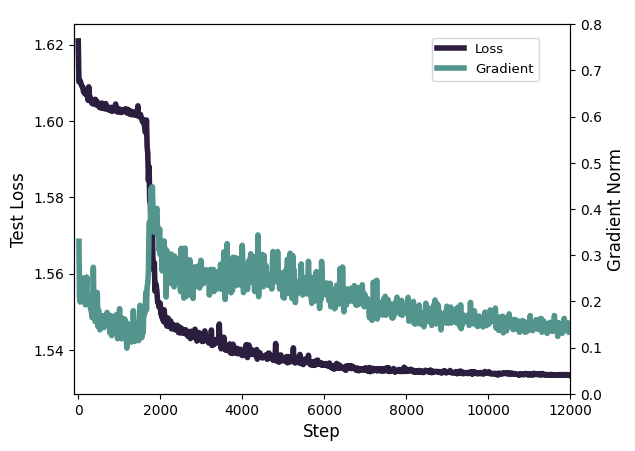

<Figure size 1200x600 with 0 Axes>

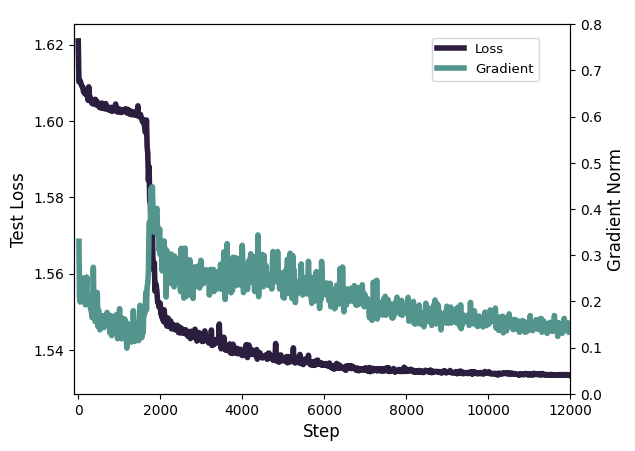

In [92]:
plot_losses(losses, bayes, save_every =1, unigram = ungiram, bigram=bigram, trigram=None, fontsize = 12)

In [96]:
api = wandb.Api()
run = api.run("/varadi-epfl/sub-n-grams/runs/8euaaqn4")
h = run.scan_history()

In [97]:
ungiram = run.summary["unigram"]
bigram = run.summary["bigram"]
bayes = run.summary["bayes"]

In [98]:
losses = [row["loss"] for row in h]
grad_norms = [row["grad_norm"] for row in h]
bayes = [row["bayes"] for row in h]
unigram = [row["unigram"] for row in h]
bigram = [row["bigram"] for row in h]
step = [row["step"] for row in h]

In [100]:
Qnorm = [row["Q"] for row in h]
Knorm = [row["Kt"] for row in h]

In [101]:
A1 = [row["A_layer0_head1_norm"] for row in h]
A2 = [row["A_layer0_head0_norm"] for row in h]

In [106]:
custom_CMAP = sns.cubehelix_palette(8, start=0.5, rot=-0.75, as_cmap=True, reverse=True)
colors = custom_CMAP(jnp.linspace(0, 1, 7))

def plot_losses(
    test_losses,
    bayes,
    save_every,
    fontsize=20,
    unigram=None,
    bigram=None,
    trigram=None,
):
    fig = plt.figure(figsize=(12, 6))
    
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()

    # if unigram is not None:
    #     plt.axhline(unigram, c=colors[6], ls="--", label="Unigram", linewidth=3 )
    # if bigram is not None:
    #     plt.axhline(bigram[0], c=colors[5], ls="--", label="Bayes", linewidth=3 )

    ax1.plot(step, jnp.array(test_losses), c=colors[0], linewidth=4, label="Loss")
    ax2.plot(step, jnp.array(grad_norms), c=colors[3], linewidth=4 , label="Gradient")


    fig.legend(fontsize=fontsize * 0.8, loc = (0.680,0.820))
    # sns.despine()
    ax1.set_xlabel("Step", fontsize=fontsize)
    ax1.set_ylabel("Test Loss", fontsize=fontsize)
    ax1.set_xlim(-100, 12000)
    ax2.set_ylim(0, 0.8)
    ax2.set_ylabel("Gradient Norm", fontsize=fontsize)

    #ax1.set_yticks(fontsize=fontsize * 0.8)
    #ax1.set_xticks(fontsize=fontsize * 0.8)
    plt.savefig("loss1.png", bbox_inches="tight")
    return fig

/var/folders/ym/9dzkcpkd1zd2vh5z6_zbczk00000gp/T/ipykernel_47042/2575446891.py:23: FutureWarning: None encountered in jnp.array(); this is currently treated as NaN. In the future this will result in an error.
  ax1.plot(step, jnp.array(test_losses), c=colors[0], linewidth=4, label="Loss")
/var/folders/ym/9dzkcpkd1zd2vh5z6_zbczk00000gp/T/ipykernel_47042/2575446891.py:24: FutureWarning: None encountered in jnp.array(); this is currently treated as NaN. In the future this will result in an error.
  ax2.plot(step, jnp.array(grad_norms), c=colors[3], linewidth=4 , label="Gradient")


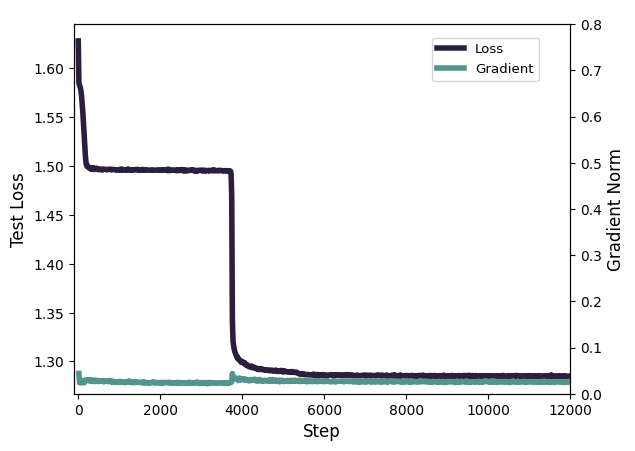

<Figure size 1200x600 with 0 Axes>

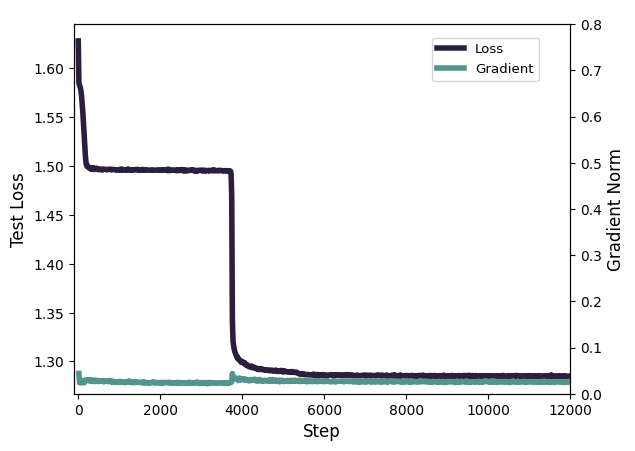

In [108]:
plot_losses(losses, bayes, save_every =1, unigram = ungiram, bigram=bigram, trigram=None, fontsize = 12)

/var/folders/ym/9dzkcpkd1zd2vh5z6_zbczk00000gp/T/ipykernel_47042/2273236407.py:17: FutureWarning: None encountered in jnp.array(); this is currently treated as NaN. In the future this will result in an error.
  ax1.plot(step, jnp.array(Qnorm)/jnp.sqrt(5), c=colors[0], linewidth=4, label="Q")
/var/folders/ym/9dzkcpkd1zd2vh5z6_zbczk00000gp/T/ipykernel_47042/2273236407.py:18: FutureWarning: None encountered in jnp.array(); this is currently treated as NaN. In the future this will result in an error.
  ax1.plot(step, jnp.array(Knorm)/jnp.sqrt(5), c=colors[1], linewidth=4 , label="K")
/var/folders/ym/9dzkcpkd1zd2vh5z6_zbczk00000gp/T/ipykernel_47042/2273236407.py:19: FutureWarning: None encountered in jnp.array(); this is currently treated as NaN. In the future this will result in an error.
  ax1.plot(step, jnp.array(A1)/jnp.sqrt(128), c=colors[2], linewidth=4, label="A_head1")
/var/folders/ym/9dzkcpkd1zd2vh5z6_zbczk00000gp/T/ipykernel_47042/2273236407.py:20: FutureWarning: None encountered 

<Figure size 1200x600 with 0 Axes>

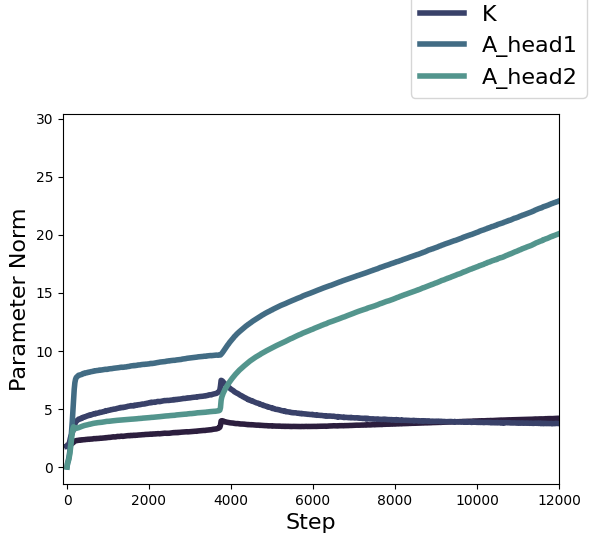

In [107]:
custom_CMAP = sns.cubehelix_palette(8, start=0.5, rot=-0.75, as_cmap=True, reverse=True)
colors = custom_CMAP(jnp.linspace(0, 1, 7))


fontsize=20,

fig = plt.figure(figsize=(12, 6))

fig, ax1 = plt.subplots()
#ax2 = ax1.twinx()

# if unigram is not None:
#     plt.axhline(unigram, c=colors[6], ls="--", label="Unigram", linewidth=3 )
# if bigram is not None:
#     plt.axhline(bigram[0], c=colors[5], ls="--", label="Bayes", linewidth=3 )

ax1.plot(step, jnp.array(Qnorm)/jnp.sqrt(5), c=colors[0], linewidth=4, label="Q")
ax1.plot(step, jnp.array(Knorm)/jnp.sqrt(5), c=colors[1], linewidth=4 , label="K")
ax1.plot(step, jnp.array(A1)/jnp.sqrt(128), c=colors[2], linewidth=4, label="A_head1")
ax1.plot(step, jnp.array(A2)/jnp.sqrt(128), c=colors[3], linewidth=4, label="A_head2")


fig.legend(fontsize=16, loc = (0.680,0.820))
# sns.despine()
ax1.set_xlabel("Step", fontsize=16)
ax1.set_ylabel("Parameter Norm", fontsize=16)
ax1.set_xlim(-100, 12000)
#ax2.set_ylim(0, 0.8)
#ax2.set_ylabel("Gradient Norm", fontsize=fontsize)

#ax1.set_yticks(fontsize=fontsize * 0.8)
#ax1.set_xticks(fontsize=fontsize * 0.8)
plt.savefig("param_norm_simple.png", bbox_inches="tight")
